In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import json
from collections import Counter
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Import data

In [ ]:
##Import trip info
trips_sa = pd.read_csv ('drive/MyDrive/Amenities/output/BUA_trips_bga_sa_amenitiesadded2.csv', index_col = False)
trips_th = pd.read_csv ('drive/MyDrive//Amenities/output/BUA_trips_bga_th_amenitiesadded2.csv', index_col = False)
trips_sa.head(2)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,naics_code,location_name,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity
0,1.415185e+19,3.820938e+18,4.456505e+18,CARPOOL,111.0,101.180729,2.300502e+11,2.502507e+11,71,239-222@62j-sj3-sqz,713940.0,Balance At Urbanity Dance,Other Amusement and Recreation Industries,Fitness and Recreational Sports Centers,1,Gym,7139,Recreation,Leisure & Wellness
1,5.174423e+18,1.503045e+19,1.449734e+19,PUBLIC_TRANSIT,59.0,7.325792,2.502505e+11,2.502598e+11,71,zzw-222@62j-sck-j7q,712190.0,Franklin Park,"Museums, Historical Sites, and Similar Institu...",Nature Parks and Other Similar Institutions,0,Zoos and Nature Parks,7121,Recreation,Entertainment


In [ ]:
trips_th = trips_th.replace('Professional services', 'Professional Services')
trips_sa = trips_sa.replace('Professional services', 'Professional Services')

In [ ]:
trips_sa['mode'].unique()

array(['CARPOOL', 'PUBLIC_TRANSIT', 'ON_DEMAND_AUTO', 'OTHER_TRAVEL_MODE',
       'WALKING', 'BIKING', 'PRIVATE_AUTO'], dtype=object)

# Frequency analysis

In [ ]:
cond1 = {
    'BIKING': 'Biking',
    'CARPOOL':'Car',
    'ON_DEMAND_AUTO':'Car',
    'PRIVATE_AUTO':'Car',
    'PUBLIC_TRANSIT':'Public_transport',
    'WALKING':'Walking'
}

trips_sa['mode'] = trips_sa['mode'].map(cond1)
trips_th['mode'] = trips_th['mode'].map(cond1)
trips_sa=trips_sa[trips_sa['mode'].notnull()]
trips_th=trips_th[trips_th['mode'].notnull()]

trips_sa.sort_index(axis = 1)
trips_th.sort_index(axis = 1)

,activity_id,destination_bgrp,distance_miles,duration_minutes,household_id,location_name,mode,naics_4,naics_category,naics_code,origin_bgrp,person_id,placekey,sub_amenity,sub_category,top_amenity,top_category,travel_purpose,vehicles
0,5.171354e+18,2.502508e+11,1.493868,6.0,1.163440e+19,M & M Ribs,Car,7223,72,722320.0,2.502506e+11,7.734123e+18,zzw-222@62j-sjp-qj9,Special Food Services,Caterers,F&B Eatery,Special Food Services,Eat,3
1,1.678649e+19,2.502508e+11,5.193408,17.0,1.581380e+19,Caffè Nero,Car,7225,72,722515.0,2.502504e+11,1.748523e+18,22b-226@62j-sgf-j9z,Snack and Nonalcoholic Beverage Bars,Snack and Nonalcoholic Beverage Bars,F&B Eatery,Restaurants and Other Eating Places,Eat,2
2,1.026687e+19,2.501735e+11,3.948695,21.0,4.376605e+18,Mainely Burgers,Biking,7225,72,722511.0,2.501735e+11,7.278027e+18,22y-222@62j-sj2-t35,Full-Service Restaurants,Full-Service Restaurants,F&B Eatery,Restaurants and Other Eating Places,Eat,1
3,5.553640e+18,2.502512e+11,0.127681,2.0,1.381520e+19,Tavern Club,Walking,7225,72,722511.0,2.502512e+11,7.098890e+18,24g-222@62j-sg9-ks5,Full-Service Restaurants,Full-Service Restaurants,F&B Eatery,Restaurants and Other Eating Places,Eat,0
4,1.672726e+19,2.502501e+11,1.356521,4.0,1.818483e+19,Rhett's,Car,7225,72,722511.0,2.502500e+11,1.769660e+19,222-225@62j-sgf-fmk,Full-Service Restaurants,Full-Service Restaurants,F&B Eatery,Restaurants and Other Eating Places,Eat,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210388,1.368682e+19,2.502500e+11,0.061125,1.0,2.987716e+18,Chonga Fanwei Circular Kung Fu Academy,Walking,6116,61,611620.0,2.502501e+11,1.832456e+19,222-223@62j-sgf-syv,Sports and Recreation Instruction,Sports and Recreation Instruction,Education,Other Schools and Instruction,School,0
210389,1.010424e+19,2.502501e+11,1.177918,17.0,1.048480e+19,Kids Are People Elementary School,Public_transport,6111,61,611110.0,2.502507e+11,1.592686e+19,23h-222@62j-sgg-d35,Elementary School,Elementary and Secondary Schools,Education,Elementary and Secondary Schools,School,2
210391,1.277694e+19,2.502505e+11,30.314164,39.0,1.593482e+19,Einstein Tutoring,Car,6116,61,611691.0,2.500925e+11,4.192011e+18,zzw-222@62j-sj6-xwk,Other Schools and Instruction,Exam Preparation and Tutoring,Education,Other Schools and Instruction,School,1
210393,1.493686e+19,2.502501e+11,0.184493,3.0,3.824557e+18,Simmons College Residence Campus,Walking,6113,61,611310.0,2.502501e+11,9.535223e+18,22b-222@62j-sgf-mp9,Universities,"Colleges, Universities, and Professional Schools",Education,"Colleges, Universities, and Professional Schools",School,0


In [ ]:
trips_sa=trips_sa[trips_sa['travel_purpose'].notnull()]
trips_th=trips_th[trips_th['travel_purpose'].notnull()]

In [ ]:
len(trips_sa)

332397

In [ ]:
#Import population in Boston
boston_pop = pd.read_csv ('drive/MyDrive/Amenities/output/bigquery_BUA_population.csv', index_col = False)
boston_pop['person_id'] = boston_pop['person_id'].astype(float)
boston_pop.head(2)

,household_id,person_id,BLOCKGROUP,age,individual_income,household_size,household_income,family_structure,vehicles
0,7670780544235756806,1.208496e+19,250173537002,88,178836,2_person,244316,nonfamily_single,1
1,12636066713864596213,1.707506e+19,250214010003,88,54048,3_person,80556,married_couple,1


# Mode, distance and time travel analysis



In [ ]:
#Count how many people use each transport mode depending on the travel purpose
count_transport_mode_sa = trips_sa.groupby(['top_amenity', 'mode']).agg({'activity_id': 'count'}).reset_index().rename(columns = {'activity_id': 'n_trips'})
count_transport_mode_th = trips_th.groupby(['top_amenity', 'mode']).agg({'activity_id': 'count'}).reset_index().rename(columns = {'activity_id': 'n_trips'})

#Merge them to form a week
count_transport_mode_sa['n_trips']=2*count_transport_mode_sa['n_trips']
count_transport_mode_th['n_trips']=5*count_transport_mode_th['n_trips']

count_transport_mode_week = pd.concat([count_transport_mode_th, count_transport_mode_sa]).reset_index().drop('index', axis = 1)
count_transport_mode_week = count_transport_mode_week.groupby(['top_amenity', 'mode'])['n_trips'].sum().reset_index()

#Merge them to form a month
count_transport_mode_month = count_transport_mode_week.copy()
count_transport_mode_month['n_trips'] = round(count_transport_mode_week['n_trips']*52/12,0) # weeks in a year divided by the number of months
count_transport_mode_month.head(5)

,top_amenity,mode,n_trips
0,Cultural,Biking,3059.0
1,Cultural,Car,65646.0
2,Cultural,Public_transport,30091.0
3,Cultural,Walking,64740.0
4,Education,Biking,4398.0


In [ ]:
#Count number of trips to each travel purpose
count_purpose = count_transport_mode_month.groupby(['top_amenity'])['n_trips'].sum().reset_index().rename(columns = {'n_trips': 'n_visits'})
count_purpose.head(2)

,top_amenity,n_visits
0,Cultural,163536.0
1,Education,234909.0


In [ ]:
total_trips=count_purpose['n_visits'].sum()
total_trips

7385231.0

In [ ]:
count_trips_by_mode= count_transport_mode_month.groupby(['mode'])['n_trips'].sum().reset_index()
count_trips_by_mode['% trips']=count_trips_by_mode['n_trips']/total_trips*100
count_trips_by_mode

,mode,n_trips,% trips
0,Biking,119568.0,1.619015
1,Car,2975598.0,40.291197
2,Public_transport,1456962.0,19.728049
3,Walking,2833103.0,38.361738


In [ ]:
#Merge tranport use and travel purpose to get percentage of transport modes depending on the travel purpose
analysis = count_transport_mode_month.merge(count_purpose, on='top_amenity', how = 'left')
analysis['% trips']=analysis['n_trips']/analysis['n_visits']*100
analysis.head(2)

,top_amenity,mode,n_trips,n_visits,% trips
0,Cultural,Biking,3059.0,163536.0,1.870536
1,Cultural,Car,65646.0,163536.0,40.141620


In [ ]:
#Merge trips to form a week
trips_week = pd.concat([trips_th, trips_th, trips_th, trips_th, trips_th, trips_sa, trips_sa]).reset_index().drop('index', axis = 1)

#Filter negative values and outliers (z > 3)
trips_aux = trips_week[(trips_week['distance_miles']>0)]
trips_aux = trips_week[(trips_week['duration_minutes']>0)]

#Get an array with the travel purpose names
travel_purpose_names=trips_week['top_amenity'].unique()

#Filter the outliers of the geometry file
trips_filt=pd.DataFrame()

for i in range(len(travel_purpose_names)):
  #Extract the travel purpose name from the array
  travel_purpose=travel_purpose_names[i]
  #Extract the trips using with that travel purpose
  trips_aux_2=trips_aux[trips_aux['top_amenity']==travel_purpose]

  #Get an array with the transport mode names
  transport_mode_names=trips_aux_2['mode'].unique()

  for i in range(len(transport_mode_names)):
    #Extract the transport mode name from the array
    transport_mode=transport_mode_names[i]
    #Extract the trips using that mode of transport
    trips_trans=trips_aux_2[trips_aux_2['mode']==transport_mode].reset_index()
    #Calculate the  scores
    trips_trans['z_scores_miles'] =stats.zscore(trips_trans['distance_miles'])
    trips_trans['z_scores_time'] =stats.zscore(trips_trans['duration_minutes'])

    #Take out the outliers
    trips_temp = trips_trans[np.abs(trips_trans['z_scores_miles']) < 3].reset_index().drop('index', axis = 1)
    trips_temp = trips_trans[np.abs(trips_trans['z_scores_time']) < 3].reset_index().drop('index', axis = 1)
    #Make a dataframe with the filtered trips
    trips_filt=pd.concat([trips_filt, trips_temp])

trips_filt = trips_filt.drop('level_0', axis=1)
trips_filt.head(2)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,location_name,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time
0,5.171354e+18,7.734123e+18,1.163440e+19,Car,6.0,1.493868,2.502506e+11,2.502508e+11,72,zzw-222@62j-sjp-qj9,...,M & M Ribs,Special Food Services,Caterers,3,Special Food Services,7223,Eat,F&B Eatery,-0.264011,-0.264840
1,1.678649e+19,1.748523e+18,1.581380e+19,Car,17.0,5.193408,2.502504e+11,2.502508e+11,72,22b-226@62j-sgf-j9z,...,Caffè Nero,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,2,Snack and Nonalcoholic Beverage Bars,7225,Eat,F&B Eatery,0.123101,0.561857


In [ ]:
#trips_filt.to_csv('drive/MyDrive/Amenities/output/trips_time_distance_filt.csv', encoding='utf-8', index=False)

In [ ]:
trips_filt = pd.read_csv ('drive/MyDrive/Amenities/output/trips_time_distance_filt.csv', index_col = False)

In [ ]:
#Calculate mean distance for each the travel purpose
mean_distance = trips_filt.groupby(['top_amenity']).agg({'distance_miles': 'mean'}).reset_index().rename(columns = {'distance_miles': 'mean_distance'})
mean_distance.head(5)

,top_amenity,mean_distance
0,Cultural,1.862962
1,Education,1.763062
2,Entertainment,2.630827
3,F&B Eatery,2.151600
4,Healthcare,2.224555


In [ ]:
#mean_distance.to_csv('drive/MyDrive/Amenities/output/current_mean_distance_sub.csv', encoding='utf-8', index=False)
mean_distance.to_csv('drive/MyDrive/Amenities/output/current_mean_distance_top.csv', encoding='utf-8', index=False)

In [ ]:
#Calculate mean distance for each transport mode depending on the travel purpose
mean_distance_by_mode = trips_filt.groupby(['top_amenity', 'mode']).agg({'distance_miles': 'mean'}).reset_index().rename(columns = {'distance_miles': 'mean_distance'})
mean_distance_by_mode.head(5)

,top_amenity,mode,mean_distance
0,Cultural,Biking,1.300364
1,Cultural,Car,2.891232
2,Cultural,Public_transport,2.529344
3,Cultural,Walking,0.446415
4,Education,Biking,1.202330


In [ ]:
#Calculate mean time travel for each transport mode depending on the travel purpose
mean_traveltime_by_mode = trips_filt.groupby(['top_amenity', 'mode']).agg({'duration_minutes': 'mean'}).reset_index().rename(columns = {'duration_minutes': 'mean_traveltime'})
mean_traveltime_by_mode.head(5)

,top_amenity,mode,mean_traveltime
0,Cultural,Biking,7.293431
1,Cultural,Car,7.819528
2,Cultural,Public_transport,23.205012
3,Cultural,Walking,8.140737
4,Education,Biking,6.880086


In [ ]:
#Merge tranport use and travel purpose to get percentage of transport modes depending on the travel purpose
analysis = analysis.merge(mean_distance_by_mode, on=['top_amenity', 'mode'], how = 'left')
analysis = analysis.merge(mean_traveltime_by_mode, on=['top_amenity', 'mode'], how = 'left')
analysis.head(2)

,top_amenity,mode,n_trips,n_visits,% trips,mean_distance,mean_traveltime
0,Cultural,Biking,3059.0,163536.0,1.870536,1.300364,7.293431
1,Cultural,Car,65646.0,163536.0,40.141620,2.891232,7.819528


In [ ]:
pivot_analysis = pd.pivot_table(data=analysis, index=['mode'], columns=['top_amenity'], values='% trips')
pivot_analysis

top_amenity,Cultural,Education,Entertainment,F&B Eatery,Healthcare,Hotel,Leisure & Wellness,Professional Services,Public Admin,Religious,Retail (Consumer Goods),Retail (Durable Goods),Retail (Grocery),Retail (Pharmacy),Service,Transport Hub
mode,,,,,,,,,,,,,,,,
Biking,1.870536,1.872214,1.686951,1.785517,1.804225,1.549701,1.840489,1.456712,1.948848,1.544271,1.323594,1.278545,1.219500,1.189552,1.554052,1.006167
Car,40.141620,35.733412,43.838457,43.101748,43.929619,46.828514,44.654052,43.931426,40.612365,39.113060,32.860672,34.920392,32.152487,34.225838,40.547677,53.023910
Public_transport,18.400230,16.205424,23.871248,21.615772,20.213354,24.785785,20.015511,21.548903,18.975151,19.888413,17.169642,14.819596,14.823412,14.587336,16.423047,29.021963
Walking,39.587614,46.188950,30.603344,33.496964,34.052802,26.835999,33.489948,33.062959,38.463635,39.454256,48.646093,48.981467,51.804601,49.997275,41.475224,16.947961


In [ ]:
pivot_analysis.reset_index(inplace=True)
pivot_analysis = pivot_analysis.rename(columns = {'index':'mode'})
pivot_analysis

top_amenity,mode,Cultural,Education,Entertainment,F&B Eatery,Healthcare,Hotel,Leisure & Wellness,Professional Services,Public Admin,Religious,Retail (Consumer Goods),Retail (Durable Goods),Retail (Grocery),Retail (Pharmacy),Service,Transport Hub
0,Biking,1.870536,1.872214,1.686951,1.785517,1.804225,1.549701,1.840489,1.456712,1.948848,1.544271,1.323594,1.278545,1.219500,1.189552,1.554052,1.006167
1,Car,40.141620,35.733412,43.838457,43.101748,43.929619,46.828514,44.654052,43.931426,40.612365,39.113060,32.860672,34.920392,32.152487,34.225838,40.547677,53.023910
2,Public_transport,18.400230,16.205424,23.871248,21.615772,20.213354,24.785785,20.015511,21.548903,18.975151,19.888413,17.169642,14.819596,14.823412,14.587336,16.423047,29.021963
3,Walking,39.587614,46.188950,30.603344,33.496964,34.052802,26.835999,33.489948,33.062959,38.463635,39.454256,48.646093,48.981467,51.804601,49.997275,41.475224,16.947961


In [ ]:
#pivot_analysis.to_csv('drive/MyDrive/Amenities/output/time_myreplica_amenities_mean_traveltime.csv', encoding='utf-8', index=False)

In [ ]:
analysis[analysis['top_amenity']=='Entertainment ']

,top_amenity,mode,n_trips,n_visits,% trips,mean_distance,mean_traveltime
8,Entertainment,Biking,5906.0,350099.0,1.686951,1.558047,8.876777
9,Entertainment,Car,153478.0,350099.0,43.838457,3.770070,9.518174
10,Entertainment,Public_transport,83573.0,350099.0,23.871248,3.110382,27.889272
11,Entertainment,Walking,107142.0,350099.0,30.603344,0.479713,8.781733


# Graphics

In [ ]:
trips_stu=trips_filt[trips_filt['sub_amenity']=='Florist']

In [ ]:
#Segment into groups
trips_stu['d_bins'] = pd.cut(trips_stu['distance_miles'], bins =[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
trips_stu.head(3)

<ipython-input-13-512678f551d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_stu['d_bins'] = pd.cut(trips_stu['distance_miles'], bins =[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])


,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time,d_bins
0,1.617106e+19,8.685604e+18,1.260289e+19,Public_transport,9.0,2.017736,2.502598e+11,2.502503e+11,45,226-222@62j-shz-s3q,...,Florists,Florists,0,Florist,4531,Shop,Retail (Consumer Goods),-0.288455,-1.111083,"(2.0, 2.25]"
8,1.259935e+19,3.820291e+18,6.152981e+18,Public_transport,21.0,3.811337,2.502509e+11,2.502507e+11,45,zzw-22c@62j-shz-435,...,Florists,Florists,0,Florist,4531,Shop,Retail (Consumer Goods),0.381287,-0.201576,NaN
9,1.497538e+19,3.036856e+18,8.175842e+18,Public_transport,25.0,3.364239,2.502509e+11,2.502507e+11,45,zzy-22h@62j-shz-52k,...,Florists,Florists,0,Florist,4531,Shop,Retail (Consumer Goods),0.214337,0.101593,NaN


In [ ]:
count_trips_per_transport = trips_stu.groupby(['mode', 'd_bins'])['activity_id'].count().to_frame().reset_index().rename(columns = {'activity_id': 'n_trips'})
count_trips_per_transport.head(2)

,mode,d_bins,n_trips
0,Biking,"(0.0, 0.25]",0
1,Biking,"(0.25, 0.5]",0


In [ ]:
count_trips_per_distance = trips_stu.groupby(['d_bins'])['activity_id'].count().to_frame().reset_index().rename(columns = {'activity_id': 'total_trips'})
count_trips_per_distance.head(2)

,d_bins,total_trips
0,"(0.0, 0.25]",54
1,"(0.25, 0.5]",75


In [ ]:
#Merge tranport use and travel purpose to get percentage of transport modes depending on the travel purpose
count_trips_per_distance = count_trips_per_distance.merge(count_trips_per_transport, on='d_bins', how = 'left')
count_trips_per_distance['% trips']=count_trips_per_distance['n_trips']/count_trips_per_distance['total_trips']*100
count_trips_per_distance = count_trips_per_distance.reindex(columns=['mode', 'd_bins', 'n_trips', 'total_trips', '% trips'])
count_trips_per_distance.head(2)

,mode,d_bins,n_trips,total_trips,% trips
0,Biking,"(0.0, 0.25]",0,54,0.000000
1,Car,"(0.0, 0.25]",2,54,3.703704


In [ ]:
pivot = pd.pivot_table(data=count_trips_per_distance, index=['d_bins'], columns=['mode'], values='% trips')
pivot

mode,Biking,Car,Public_transport,Walking
d_bins,,,,
"(0.0, 0.25]",0.000000,3.703704,0.000000,96.296296
"(0.25, 0.5]",0.000000,10.666667,0.000000,89.333333
"(0.5, 0.75]",3.571429,14.285714,26.785714,55.357143
"(0.75, 1.0]",0.000000,41.666667,3.333333,55.000000
"(1.0, 1.25]",0.000000,71.428571,14.285714,14.285714
"(1.25, 1.5]",0.000000,55.555556,0.000000,44.444444
"(1.5, 1.75]",0.000000,80.000000,10.000000,10.000000
"(1.75, 2.0]",18.181818,45.454545,36.363636,0.000000
"(2.0, 2.25]",0.000000,23.333333,76.666667,0.000000


Text(0.5, 0, 'distance (miles)')

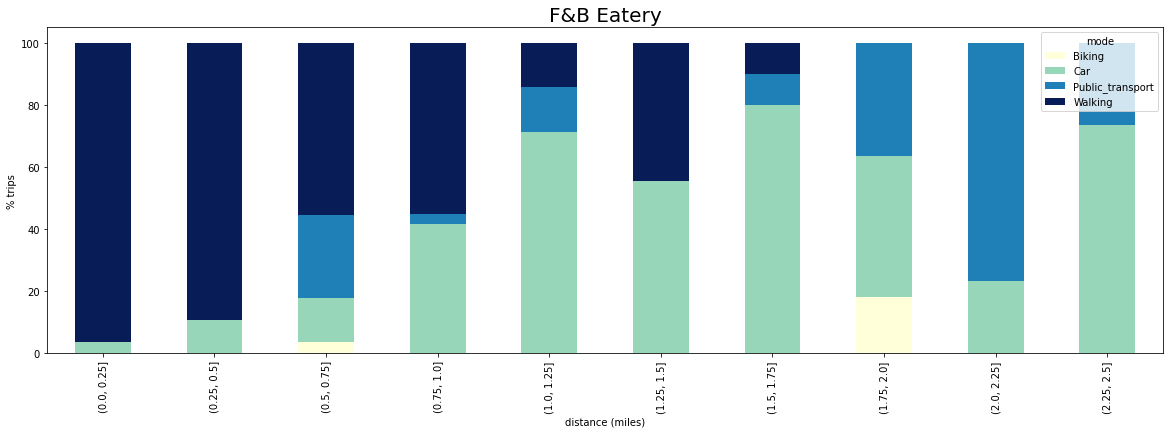

In [ ]:
ax = pivot.plot.bar(cmap="YlGnBu", stacked=True, figsize=(20,6))
ax.set_title('F&B Eatery', fontsize=20)
plt.ylabel('% trips')
plt.xlabel('distance (miles)')
#ax.set_ylim(0,500)
#ax.set_xticklabels(['A','B','C'], rotation=0)

In [ ]:
trips_stu.head(2)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time,d_bins
598,1.773226e+19,7.414206e+18,1.219794e+19,Public_transport,41.0,4.225934,2.502598e+11,2.502506e+11,71,22w-223@62j-shy-pvz,...,Other Amusement and Recreation Industries,Bowling Centers,1,Bowling,7139,Recreation,Entertainment,0.311321,0.801540,NaN
947,2.492456e+18,8.239878e+18,9.771856e+18,Public_transport,49.0,5.906384,2.502508e+11,2.502505e+11,71,26f-222@62j-sj7-s89,...,Other Amusement and Recreation Industries,Bowling Centers,0,Bowling,7139,Recreation,Entertainment,0.856599,1.311256,NaN


# Logistic regression

In [ ]:
#https://realpython.com/logistic-regression-python/

trips_stu=trips_filt[trips_filt['sub_amenity']=='Full-Service Restaurants']
trips_stu_2=trips_stu[trips_stu['distance_miles']<1.5].reset_index(drop=True)
cond = {
    'Car': 1
}

trips_stu_2['binary_walk'] = trips_stu_2['mode'].map(cond).fillna(0)

trips_stu_2.sort_index(axis = 1)
trips_stu_2.head(10)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time,binary_walk
0,1.672726e+19,1.769660e+19,1.818483e+19,Car,4.0,1.356521,2.502500e+11,2.502501e+11,72,222-225@62j-sgf-fmk,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.278383,-0.415149,1.0
1,1.761693e+19,1.367571e+19,1.422886e+19,Car,2.0,0.757263,2.502501e+11,2.502501e+11,72,zzw-223@62j-sgg-8y9,...,Restaurants and Other Eating Places,Full-Service Restaurants,0,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.341088,-0.565457,1.0
2,1.293798e+18,1.402693e+19,6.769648e+18,Car,3.0,0.894957,2.502501e+11,2.502501e+11,72,222-228@62j-sj3-p35,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.326680,-0.490303,1.0
3,9.543656e+18,3.113479e+18,5.930614e+18,Car,3.0,1.184689,2.502512e+11,2.502512e+11,72,24g-222@62j-sg9-ks5,...,Restaurants and Other Eating Places,Full-Service Restaurants,2,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.296363,-0.490303,1.0
4,1.334743e+19,7.367334e+18,1.166138e+18,Car,5.0,1.387054,2.502507e+11,2.502507e+11,72,224-222@62j-shy-zj9,...,Restaurants and Other Eating Places,Full-Service Restaurants,2,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.275188,-0.339995,1.0
5,1.506333e+19,1.359195e+19,1.198062e+19,Car,4.0,1.159449,2.502503e+11,2.502502e+11,72,23g-222@62j-shx-cyv,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.299004,-0.415149,1.0
6,3.592403e+18,1.366075e+19,1.535640e+19,Car,2.0,0.800751,2.502508e+11,2.502508e+11,72,22q-222@62j-sgh-b6k,...,Restaurants and Other Eating Places,Full-Service Restaurants,0,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.336537,-0.565457,1.0
7,3.405973e+18,1.656295e+19,1.837299e+19,Car,2.0,0.715128,2.502508e+11,2.502508e+11,72,zzw-223@62j-sgh-rff,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.345497,-0.565457,1.0
8,8.104684e+18,9.805931e+18,1.137917e+19,Car,5.0,1.430089,2.502512e+11,2.502512e+11,72,22r-222@62j-sgh-djv,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.270685,-0.339995,1.0
9,1.708782e+19,1.192751e+19,6.946035e+17,Car,4.0,1.145603,2.502501e+11,2.502502e+11,72,252-222@62j-shx-d5f,...,Restaurants and Other Eating Places,Full-Service Restaurants,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.300453,-0.415149,1.0


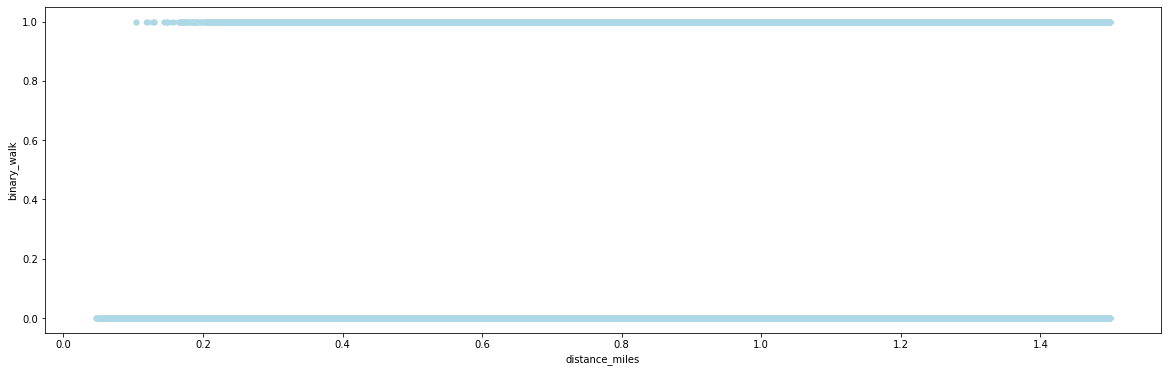

In [ ]:
trips_stu_2.plot.scatter(x='distance_miles', y='binary_walk', c='LightBlue', figsize=(20,6))
#plt.xlim([0,1.5])
plt.show()

In [ ]:
X=trips_stu_2[['distance_miles']]
model.predict_proba(X)

array([[0.39544188, 0.60455812],
       [0.64275926, 0.35724074],
       [0.58779608, 0.41220392],
       ...,
       [0.35940636, 0.64059364],
       [0.36068126, 0.63931874],
       [0.34721505, 0.65278495]])

In [ ]:
X = trips_stu_2[['distance_miles']] # Features
y = trips_stu_2.binary_walk # Target variable
# instantiate the model (using the default parameters)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

trips_stu_2['probability']=pd.DataFrame(model.predict_proba(X)).iloc[:,1]
trips_stu_2['log_reg']= model.predict(X)
trips_stu_2.head(10)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time,binary_walk,probability,log_reg
0,1.672726e+19,1.769660e+19,1.818483e+19,Car,4.0,1.356521,2.502500e+11,2.502501e+11,72,222-225@62j-sgf-fmk,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.278383,-0.415149,1.0,0.604558,1.0
1,1.761693e+19,1.367571e+19,1.422886e+19,Car,2.0,0.757263,2.502501e+11,2.502501e+11,72,zzw-223@62j-sgg-8y9,...,0,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.341088,-0.565457,1.0,0.357241,0.0
2,1.293798e+18,1.402693e+19,6.769648e+18,Car,3.0,0.894957,2.502501e+11,2.502501e+11,72,222-228@62j-sj3-p35,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.326680,-0.490303,1.0,0.412204,0.0
3,9.543656e+18,3.113479e+18,5.930614e+18,Car,3.0,1.184689,2.502512e+11,2.502512e+11,72,24g-222@62j-sg9-ks5,...,2,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.296363,-0.490303,1.0,0.533538,1.0
4,1.334743e+19,7.367334e+18,1.166138e+18,Car,5.0,1.387054,2.502507e+11,2.502507e+11,72,224-222@62j-shy-zj9,...,2,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.275188,-0.339995,1.0,0.616815,1.0
5,1.506333e+19,1.359195e+19,1.198062e+19,Car,4.0,1.159449,2.502503e+11,2.502502e+11,72,23g-222@62j-shx-cyv,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.299004,-0.415149,1.0,0.522918,1.0
6,3.592403e+18,1.366075e+19,1.535640e+19,Car,2.0,0.800751,2.502508e+11,2.502508e+11,72,22q-222@62j-sgh-b6k,...,0,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.336537,-0.565457,1.0,0.374273,0.0
7,3.405973e+18,1.656295e+19,1.837299e+19,Car,2.0,0.715128,2.502508e+11,2.502508e+11,72,zzw-223@62j-sgh-rff,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.345497,-0.565457,1.0,0.341075,0.0
8,8.104684e+18,9.805931e+18,1.137917e+19,Car,5.0,1.430089,2.502512e+11,2.502512e+11,72,22r-222@62j-sgh-djv,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.270685,-0.339995,1.0,0.633837,1.0
9,1.708782e+19,1.192751e+19,6.946035e+17,Car,4.0,1.145603,2.502501e+11,2.502502e+11,72,252-222@62j-shx-d5f,...,1,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.300453,-0.415149,1.0,0.517082,1.0


In [ ]:
trips_stu_2['probability'].max()

0.6607711683291297

In [ ]:
len(trips_stu_2)

158671

In [ ]:
model.score(X,y)

0.7111885599763031

Text(0.5, 257.44, 'Predicted label')

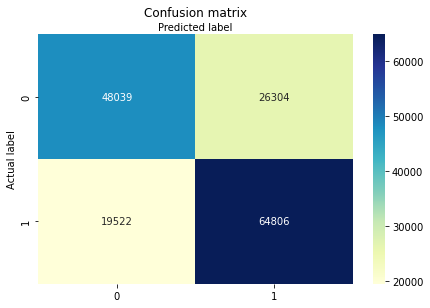

In [ ]:
cm= confusion_matrix(y, model.predict(X))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65        39
         1.0       0.64      0.66      0.65        38

    accuracy                           0.65        77
   macro avg       0.65      0.65      0.65        77
weighted avg       0.65      0.65      0.65        77



In [ ]:
#Find the probability of a person choosing to walk if the distance to the amenity is the one stated below
aux=X.iloc[0:1]
aux['distance_miles']=0.8 #distance to the amenity
model.predict_proba(aux)

<ipython-input-26-a9777d037a43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['distance_miles']=0.8 #distance to the amenity


array([[0.62602435, 0.37397565]])

In [ ]:
walking_boundary=trips_stu_2[trips_stu_2['log_reg']==1]['distance_miles'].max()
walking_boundary

0.7735384095407389

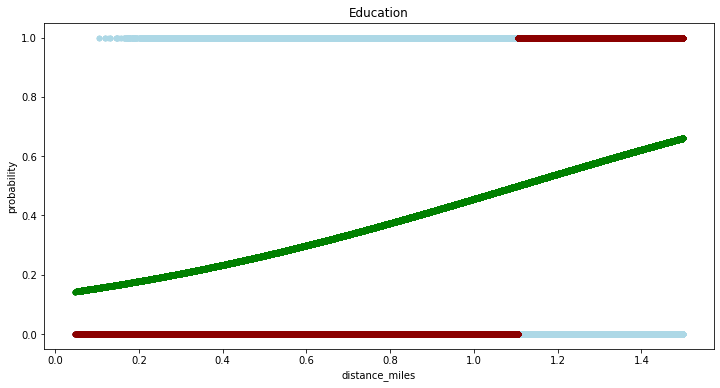

In [ ]:
ax=trips_stu_2.plot.scatter(x='distance_miles', y='binary_walk', c='LightBlue', figsize=(12,6))
trips_stu_2.plot.scatter(ax=ax, x='distance_miles', y='log_reg', c='DarkRed', figsize=(12,6))
trips_stu_2.plot.scatter(ax=ax, x='distance_miles', y='probability', c='Green', figsize=(12,6))
plt.title('Education', y=1)
plt.show()

In [ ]:
# Con train y test: https://www.datacamp.com/tutorial/understanding-logistic-regression-python

X = trips_stu_2[['distance_miles']] # Features
y = trips_stu_2.binary_walk # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
# instantiate the model (using the default parameters)
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

y_prop=pd.DataFrame(model.predict_proba(X_test))
y_pred= model.predict(X_test)
model.score(X_test,y_test)

0.7555803571428571

Text(0.5, 257.44, 'Predicted label')

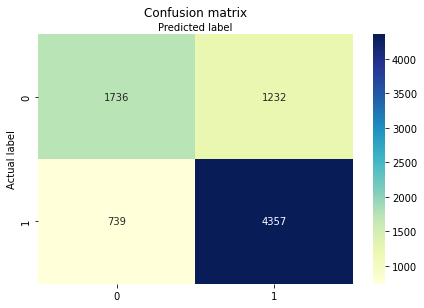

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Explore data

In [ ]:
trips_stu_2=trips_stu_2.merge(boston_pop[['person_id', 'age', 'individual_income']], how='left', on='person_id')
trips_stu_2.head(2)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time,binary_walk,probability,log_reg,age,individual_income
0,5.171354e+18,7.734123e+18,1.163440e+19,Car,6.0,1.493868,2.502506e+11,2.502508e+11,72,229-222@62j-sjp-3kf,...,7225,Eat,F&B Eatery,-0.263975,-0.266033,0.0,0.083194,0.0,80,6060
1,1.672726e+19,1.769660e+19,1.818483e+19,Car,4.0,1.356521,2.502500e+11,2.502501e+11,72,22w-222@62j-sgf-fvf,...,7225,Eat,F&B Eatery,-0.278345,-0.416598,0.0,0.120881,0.0,70,63698


In [ ]:
trips_stu_2[['age', 'individual_income', 'binary_walk']].groupby('binary_walk').mean()

,age,individual_income
binary_walk,,
0.0,43.954269,60090.505076
1.0,34.773776,49850.644585


# Obtain walking boundary for each amenity

In [ ]:
trips_filt = pd.read_csv ('drive/MyDriveAmenities/output/trips_time_distance_filt.csv', index_col = False)

In [ ]:
walking_time=trips_filt[['top_amenity', 'sub_amenity']]
walking_time=walking_time.drop_duplicates(subset=['sub_amenity']).reset_index().drop('index', axis = 1)
walking_time['dist_limit']=""
walking_time.head(2)

,top_amenity,sub_amenity,dist_limit
0,F&B Eatery,Special Food Services,
1,F&B Eatery,Snack and Nonalcoholic Beverage Bars,


In [ ]:
#import pdb
trips_aux=trips_filt[['activity_id', 'mode', 'duration_minutes', 'distance_miles', 'top_amenity', 'sub_amenity']]
for i in range(walking_time['top_amenity'].nunique()):
  #pdb.set_trace()
  top_amenity=walking_time['top_amenity'].unique()[i]

  list_trips_top=trips_aux[trips_aux['top_amenity']==top_amenity]

  for i in range(list_trips_top['sub_amenity'].nunique()):
    sub_amenity=list_trips_top['sub_amenity'].unique()[i]
    list_trips_sub=list_trips_top[list_trips_top['sub_amenity']==sub_amenity]

    if (list_trips_sub.empty == False):
      list_trips_sub['binary_walk'] = np.where(list_trips_sub["mode"] == 'Walking', 1, 0)
      #cond = {'Walking': 1}
      #list_trips_sub['binary_walk'] = list_trips_sub['mode'].map(cond).fillna(0)

      list_trips_sub=list_trips_sub[list_trips_sub['distance_miles']<1.5].reset_index(drop=True)
      X = list_trips_sub[['distance_miles']] # Features
      y = list_trips_sub.binary_walk # Target variable
      # instantiate the model (using the default parameters)
      model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

      list_trips_sub['probability']=pd.DataFrame(model.predict_proba(X)).iloc[:,1]
      list_trips_sub['log_reg']= model.predict(X)
      list_trips_sub['walk_Y/N'] = np.where(list_trips_sub['probability']>0.8, 1, 0)
      walking_boundary=list_trips_sub[list_trips_sub['walk_Y/N']==1]['distance_miles'].max()
      pos=walking_time.index[walking_time['sub_amenity']==sub_amenity]
      walking_time.at[pos, 'dist_limit']=walking_boundary
walking_time.head(10)

<ipython-input-51-7500febfdec5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_trips_sub['binary_walk'] = np.where(list_trips_sub["mode"] == 'Walking', 1, 0)
<ipython-input-51-7500febfdec5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_trips_sub['binary_walk'] = np.where(list_trips_sub["mode"] == 'Walking', 1, 0)
<ipython-input-51-7500febfdec5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,top_amenity,sub_amenity,dist_limit
0,F&B Eatery,Special Food Services,0.163885
1,F&B Eatery,Snack and Nonalcoholic Beverage Bars,0.260458
2,F&B Eatery,Full-Service Restaurants,0.229106
3,F&B Eatery,Drinking Places,0.250758
4,F&B Eatery,Limited-Service Restaurants,0.267264
5,Hotel,Hotel and Lodging,0.274962
6,Retail (Consumer Goods),Florist,0.493541
7,Retail (Consumer Goods),Book Store,0.493809
8,Retail (Consumer Goods),Clothing Store,0.444351
9,Retail (Consumer Goods),Cosmetics Retail,0.464027


In [ ]:
walking_time=walking_time.merge(mean_distance[['sub_amenity', 'mean_distance']], how='left', on='sub_amenity').rename(columns = {'mean_distance':'current_mean_distance'}).reset_index().drop('index', axis = 1)
walking_time.head(4)

In [ ]:
walking_time[walking_time['sub_amenity']=='Full-Service Restaurants']

,top_amenity,sub_amenity,dist_limit,current_mean_distance
2,F&B Eatery,Full-Service Restaurants,0.229106,2.182023


In [ ]:
#walking_time.to_csv('drive/MyDrive/Amenities/output/walking_distance_limits.csv', encoding='utf-8', index=False)

In [ ]:
#walking_time = pd.read_csv ('drive/MyDrive/Amenities/output/walking_distance_limits.csv', index_col = False)

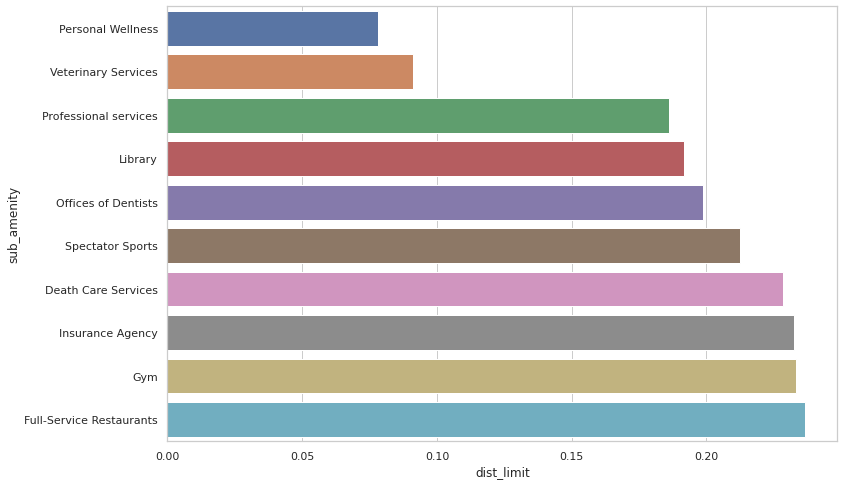

In [ ]:
#Quit the sub amenity you don't want to show
walking_time = walking_time[walking_time["sub_amenity"].str.contains("Other Repair and Maintenance") == False]
walking_time = walking_time[walking_time["sub_amenity"].str.contains("Waste Management and Remediation Services") == False]
walking_time = walking_time[walking_time["sub_amenity"].str.contains("Utilities") == False]
walking_time = walking_time[walking_time["sub_amenity"].str.contains("Manufacturing") == False]
walking_time = walking_time[walking_time["sub_amenity"].str.contains("Construction") == False]


# Plotting the top X categories
num_cat = 10 # Number of categories to plot
walking_time['dist_limit']=walking_time['dist_limit'].astype(float)
df_show=walking_time.nsmallest(num_cat, 'dist_limit')
plot_df = df_show[:num_cat].sort_values('dist_limit')
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style="whitegrid")
sns.barplot( data = plot_df, y = 'sub_amenity', x = 'dist_limit')

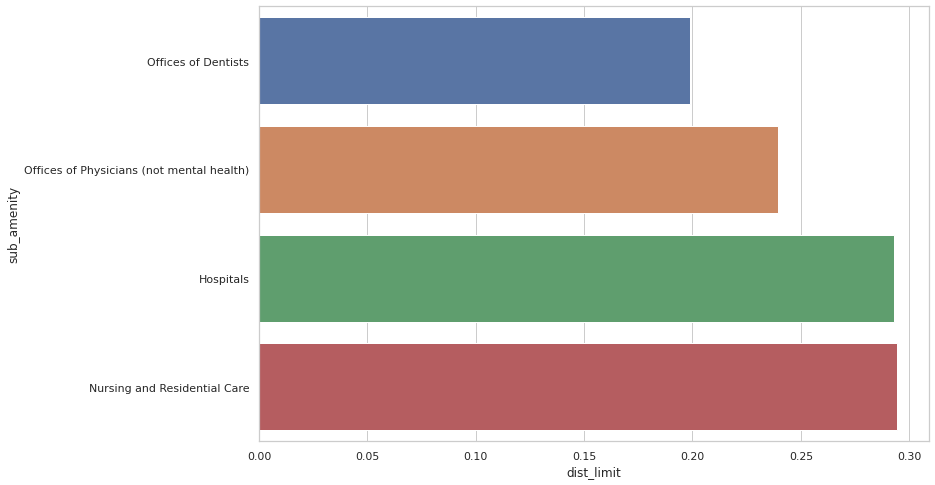

In [ ]:
trips_info_2 = walking_time[walking_time['top_amenity']=='Healthcare']
#Quit the sub amenity you don't want to show
trips_info_2 = trips_info_2[trips_info_2["sub_amenity"].str.contains("Less Frequented Stores") == False]

n=len(pd.unique(trips_info_2['sub_amenity']))

# Plotting the top X categories
num_cat = n # Number of categories to plot
df_show=walking_time.nsmallest(num_cat, 'dist_limit')
plot_df = df_show[:num_cat].sort_values('dist_limit')
plot_df = trips_info_2[:num_cat].sort_values('dist_limit')
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style="whitegrid")
sns.barplot(data = plot_df, y = 'sub_amenity', x = 'dist_limit')

# Normal distribution

In [ ]:
trips_stu_2[trips_stu_2['binary_walk']==1]['TRPMILES'].max()

1.975

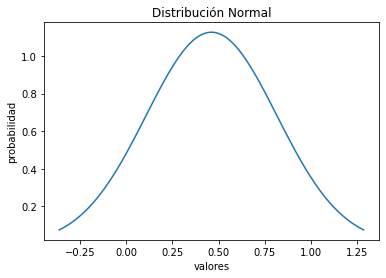

In [ ]:
mean=trips_stu_2[trips_stu_2['mode']=='Walking']['distance_miles'].mean()
stdev=trips_stu_2[trips_stu_2['mode']=='Walking']['distance_miles'].std()
normal = stats.norm(mean, stdev)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:
norm.pdf(0.75, loc=mean, scale=stdev)

0.8081031897510553

In [ ]:
trips_stu_3=trips_stu[trips_stu['mode']=='Walking']
trips_stu_3.head(2)

,activity_id,person_id,household_id,mode,duration_minutes,distance_miles,origin_bgrp,destination_bgrp,naics_category,placekey,...,location_name,top_category,sub_category,vehicles,sub_amenity,naics_4,travel_purpose,top_amenity,z_scores_miles,z_scores_time
0,5.553640e+18,7.098890e+18,1.381520e+19,Walking,2.0,0.127681,2.502512e+11,2.502512e+11,72,24g-222@62j-sg9-ks5,...,Tavern Club,Restaurants and Other Eating Places,Full-Service Restaurants,0,Full-Service Restaurants,7225,Eat,F&B Eatery,-0.896836,-0.897154
1,1.627660e+19,2.574216e+18,1.770989e+19,Walking,8.0,0.460673,2.502598e+11,2.502505e+11,72,23j-222@62j-syg-jgk,...,Melo's Cafe,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,2,Snack and Nonalcoholic Beverage Bars,7225,Eat,F&B Eatery,-0.094775,-0.147481


In [ ]:
#Segment into groups
trips_stu_3['d_bins'] = pd.cut(trips_stu_3['distance_miles'], bins =[0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
count_people_2 = trips_stu_3.groupby(['d_bins'])['activity_id'].count().to_frame().reset_index().rename(columns = {'activity_id': 'count_people'})
count_people_2.head(3)

,d_bins,count_people
0,"(0.0, 0.25]",68721
1,"(0.25, 0.5]",53588
2,"(0.5, 0.75]",31639


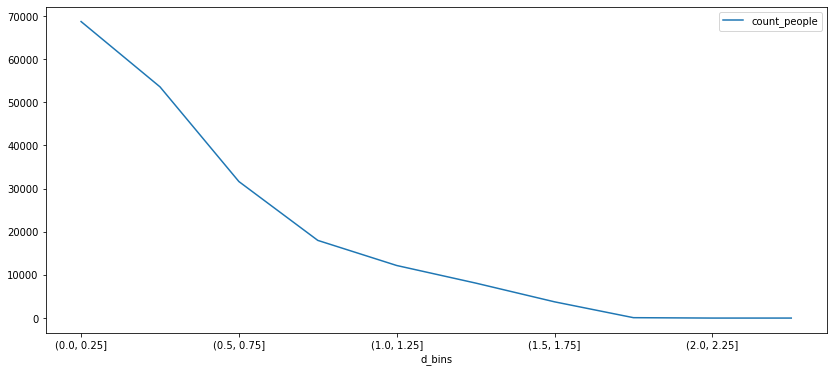

In [ ]:
count_people_2.plot(x='d_bins', y='count_people', kind='line', figsize=(14,6))

# Pruebas

In [ ]:
trips_healthcare_walk=trips_filt[trips_filt['transport_mode']=='Walk']

In [ ]:
trips_healthcare_walk['d_bins']=pd.cut(trips_healthcare_walk['TRPMILES'], 20)
trips_healthcare_walk.head(5)

<ipython-input-61-c5ce7f3fa413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_healthcare_walk['d_bins']=pd.cut(trips_healthcare_walk['TRPMILES'], 20)


,level_0,HOUSEID,PERSONID,DBPPOPDN,OBPPOPDN,HHSTATE,TRPMILES,TRPTRANS,TRVLCMIN,WHYTO,transport_mode,travel_purpose,person_id,z_scores,d_bins
0,0,30004211,1,30000,30000,MA,0.444,1,25,14,Walk,Errands,300042111,0.015825,"(0.395, 0.522]"
1,1,30004859,2,17000,17000,GA,0.703,1,15,14,Walk,Errands,300048592,0.369777,"(0.65, 0.777]"
2,2,30006683,1,30000,30000,NY,0.131,1,5,14,Walk,Errands,300066831,-0.411925,"(0.0105, 0.14]"
3,3,30028770,1,30000,30000,NY,0.034,1,1,14,Walk,Errands,300287701,-0.544486,"(0.0105, 0.14]"
4,4,30028770,1,30000,30000,NY,0.166,1,5,14,Walk,Errands,300287701,-0.364093,"(0.14, 0.268]"


In [ ]:
count_people = trips_healthcare_walk.groupby(['d_bins'])['person_id'].count().to_frame().reset_index().rename(columns = {'person_id': 'count_people'})
count_people.head(3)

,d_bins,count_people
0,"(0.0105, 0.14]",74
1,"(0.14, 0.268]",101
2,"(0.268, 0.395]",80


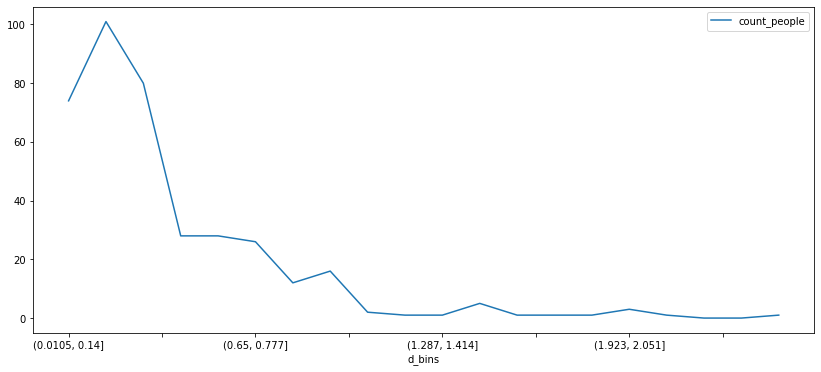

In [ ]:
count_people.plot(x='d_bins', y='count_people', kind='line', figsize=(14,6))

In [ ]:
trips_healthcare_car=trips_filt[trips_filt['transport_mode']=='Car']
trips_healthcare_car['d_bins']=pd.cut(trips_healthcare_car['TRPMILES'], 20)
trips_healthcare_car.head(5)

<ipython-input-64-3754689688ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_healthcare_car['d_bins']=pd.cut(trips_healthcare_car['TRPMILES'], 20)


,level_0,HOUSEID,PERSONID,DBPPOPDN,OBPPOPDN,HHSTATE,TRPMILES,TRPTRANS,TRVLCMIN,WHYTO,transport_mode,travel_purpose,person_id,z_scores,d_bins
0,0,30001011,1,30000,30000,NY,1.064,3,10,14,Car,Errands,300010111,-0.286737,"(-0.0143, 2.551]"
1,1,30001011,2,30000,30000,NY,1.064,3,10,14,Car,Errands,300010112,-0.286737,"(-0.0143, 2.551]"
2,2,30002324,1,17000,17000,TX,0.296,6,10,14,Car,Errands,300023241,-0.331343,"(-0.0143, 2.551]"
3,3,30002834,1,7000,17000,CA,2.169,3,20,14,Car,Errands,300028341,-0.222557,"(-0.0143, 2.551]"
4,4,30003562,1,17000,17000,CA,0.181,3,5,14,Car,Errands,300035621,-0.338022,"(-0.0143, 2.551]"


In [ ]:
count_people_car = trips_healthcare_car.groupby(['d_bins'])['person_id'].count().to_frame().reset_index().rename(columns = {'person_id': 'count_people'})
count_people_car.head(3)

,d_bins,count_people
0,"(-0.0143, 2.551]",568
1,"(2.551, 5.066]",209
2,"(5.066, 7.58]",81


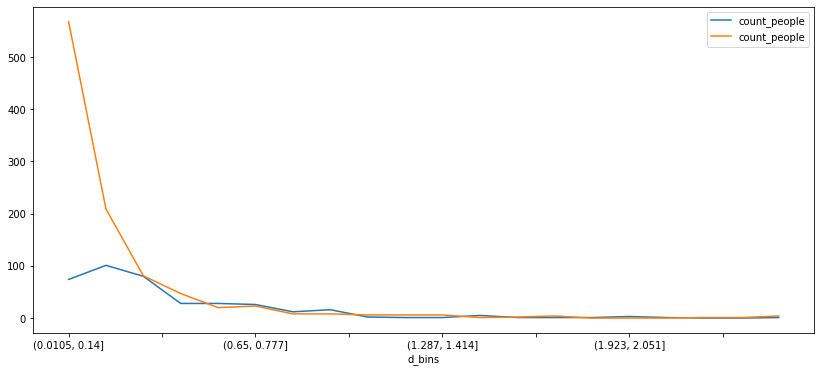

In [ ]:
ax=count_people.plot(x='d_bins', y='count_people', kind='line', figsize=(14,6))
count_people_car.plot(ax=ax)